# TP3 SVM

## Importation des bibiliothèques

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import neighbors, model_selection
import numpy as np
from sklearn.metrics import precision_score
from time import time
from sklearn.metrics import confusion_matrix 

In [2]:
#On cache les warnings pour ne pas avoir un affichage trop long
import warnings
warnings.filterwarnings('ignore')

## Importation du jeu de données

In [3]:
mnist = fetch_openml('mnist_784') 

In [26]:
data = np.random.randint(70000,size=20000)

In [27]:
xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data[data], mnist.target[data],train_size=0.7)

In [28]:
clf = SVC(kernel = "linear")

In [16]:
clf.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
clf.score(xtest,ytest)

0.90466666666666662

## Changement du noyau

In [29]:
temps = []
scores = []
for noyau in ["poly","rbf","sigmoid","linear"]:
    a = time()
    clf = SVC(kernel = noyau)
    clf.fit(xtrain,ytrain)
    score = clf.score(xtest,ytest)
    scores.append(score)
    temps.append(time()-a)
    print("Score du noyau ",noyau," : ",score)

Score du noyau  poly  :  0.9668333333333333
Score du noyau  rbf  :  0.269
Score du noyau  sigmoid  :  0.10566666666666667
Score du noyau  linear  :  0.9241666666666667


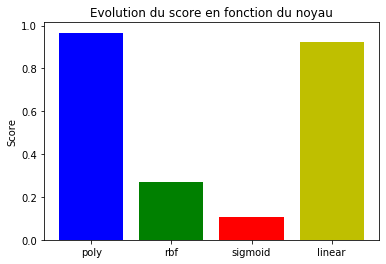

In [30]:
plt.bar(["poly","rbf","sigmoid","linear"],scores,color=["b","g","r","y"])
plt.ylabel("Score")
plt.title("Evolution du score en fonction du noyau")
plt.show()

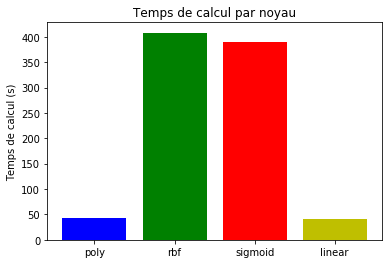

In [31]:
plt.bar(["poly","rbf","sigmoid","linear"],temps,color=["b","g","r","y"])
plt.ylabel("Temps de calcul (s)")
plt.title("Temps de calcul par noyau")
plt.show()

## Changement de la tolérance 

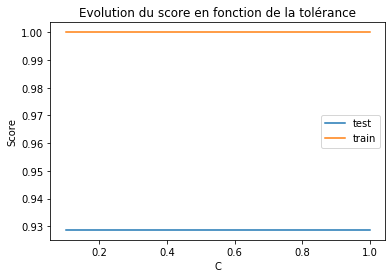

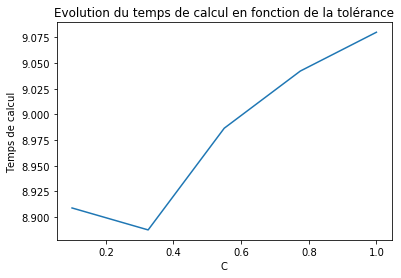

In [13]:
lst_train = []
lst_test = []
tmp_calcul = []
for tolerance in np.linspace(0.1,1,5):
    a = time()
    clf = SVC(kernel="poly",C = tolerance)
    clf.fit(xtrain,ytrain)
    lst_test.append(clf.score(xtest,ytest))
    lst_train.append(clf.score(xtrain,ytrain))
    tmp_calcul.append(time()-a)

plt.plot(np.linspace(0.1,1,5),lst_test,label="test")
plt.plot(np.linspace(0.1,1,5),lst_train,label="train")
plt.xlabel("C")
plt.ylabel("Score")
plt.title("Evolution du score en fonction de la tolérance")
plt.legend()
plt.show()

plt.plot(np.linspace(0.1,1,5),tmp_calcul)
plt.xlabel("C")
plt.ylabel("Temps de calcul")
plt.title("Evolution du temps de calcul en fonction de la tolérance")
plt.show()

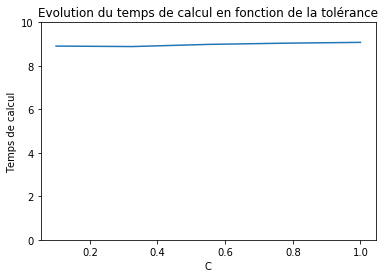

In [16]:
plt.plot(np.linspace(0.1,1,5),tmp_calcul)
plt.xlabel("C")
plt.ylabel("Temps de calcul")
plt.title("Evolution du temps de calcul en fonction de la tolérance")
plt.ylim(bottom=0,top =10)
plt.show()

In [33]:
clf = SVC(kernel = "poly")
clf.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
cm = confusion_matrix(clf.predict(xtest), ytest) 

In [35]:
cm

array([[583,   0,   2,   1,   0,   2,   1,   1,   4,   4],
       [  0, 625,   3,   2,   0,   2,   3,   3,   4,   1],
       [  0,   2, 602,  10,   2,   2,   0,   6,   3,   1],
       [  1,   1,   2, 556,   0,   8,   0,   0,   5,   1],
       [  0,   1,   1,   0, 576,   1,   0,   5,   1,   8],
       [  1,   0,   2,   6,   0, 531,   2,   0,   4,   3],
       [  0,   0,   4,   2,   1,   5, 582,   0,   5,   0],
       [  1,   2,   5,   6,   1,   1,   0, 605,   1,   8],
       [  1,   1,   3,   7,   1,   6,   0,   1, 587,   1],
       [  0,   2,   0,   1,   9,   2,   0,   7,   3, 554]], dtype=int64)

## Comparaison des méthodes <br>
Pour un set de 20 000 éléments et un split train test de 0.7

In [2]:
from sklearn import neighbors, model_selection
from sklearn.neural_network import MLPClassifier

In [3]:
mnist = fetch_openml('mnist_784') 

In [4]:
data = np.random.randint(70000,size=20000)
xtrain, xtest, ytrain, ytest =  model_selection.train_test_split(mnist.data[data], mnist.target[data],train_size=0.7)

In [5]:
Temps = []
Score = []
matrix = []

In [7]:
#K NN k = 3 n_jobs = -1 distance euclidienne

a = time()
clf = neighbors.KNeighborsClassifier(3,n_jobs=-1)
clf.fit(xtrain, ytrain)
Temps.append(time()-a)
Score.append(clf.score(xtest,ytest))
matrix.append(confusion_matrix(clf.predict(xtest), ytest) )

In [6]:
lst2 = []
for i in range(60,32,-3):
    lst2.append(i)
for i in range(31,10,-2):
    lst2.append(i)
tuple2 = tuple(lst2)
len(tuple2)

21

In [8]:
#A NN 21 couches de neuronnes avec un nombre de neurones dégressif

a = time()
clf = MLPClassifier(hidden_layer_sizes=(tuple2),solver='adam',activation ='relu',alpha=10**(-6))
clf.fit(xtrain,ytrain)
Temps.append(time()-a)
Score.append(clf.score(xtest,ytest))
matrix.append(confusion_matrix(clf.predict(xtest), ytest) )

In [9]:
#SVM Linear

a = time()
clf = SVC(kernel = "linear")
clf.fit(xtrain,ytrain)
Temps.append(time()-a)
Score.append(clf.score(xtest,ytest))
matrix.append(confusion_matrix(clf.predict(xtest), ytest) )

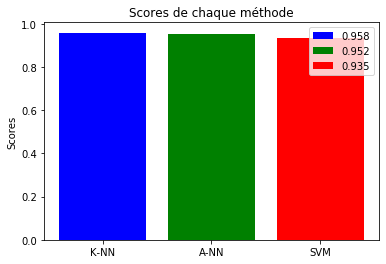

In [28]:
plt.bar(["K-NN"],Score[0],color="b",label = round(Score[0],3))
plt.bar(["A-NN"],Score[1],color="g",label = round(Score[1],3))
plt.bar(["SVM"],Score[2],color="r",label = round(Score[2],3))
plt.ylabel("Scores")
plt.title("Scores de chaque méthode")
plt.legend()
plt.show()

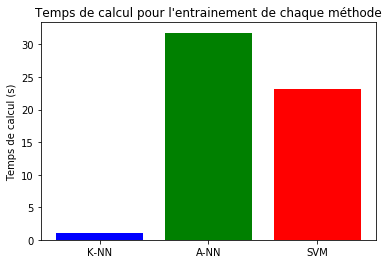

In [11]:
plt.bar(["K-NN","A-NN","SVM"],Temps,color=["b","g","r"])
plt.ylabel("Temps de calcul (s)")
plt.title("Temps de calcul pour l'entrainement de chaque méthode")
plt.show()

In [16]:
print("K-NN :\n",matrix[0],"\n")
print("A-NN :\n",matrix[1],"\n")
print("SVM :\n",matrix[2])

K-NN :
 [[568   1   4   1   1   3   5   0   2   3]
 [  2 701   6   3   5   1   0   9   8   1]
 [  0   2 573   2   0   0   0   3   1   3]
 [  0   0   1 528   0   8   0   0  16   3]
 [  0   0   1   0 540   2   2   8   0  13]
 [  0   0   0  10   0 522   4   0  15   1]
 [  4   1   3   0   3  16 591   0   1   0]
 [  0   0   9   3   0   0   0 642   3   9]
 [  0   0   3   4   1   0   1   0 526   0]
 [  0   1   2   1  20   1   0   9   5 559]] 

A-NN :
 [[561   0   1   0   1   1   4   1   3   0]
 [  1 691   1   1   0   2   1   1   4   0]
 [  3   7 586   5   1   3   0   7  16   3]
 [  0   1   5 530   1  13   0   7  25   4]
 [  1   0   1   0 537   2   0   2   0  15]
 [  0   0   0   5   1 515  10   1  11   1]
 [  3   0   3   1   4   3 584   0   2   0]
 [  1   4   3   3   2   0   0 646   1   5]
 [  0   3   1   4   5   6   4   0 502   3]
 [  4   0   1   3  18   8   0   6  13 561]] 

SVM :
 [[566   0   7   4   1   6   2   2   5   1]
 [  1 697   5   2   0   4   0   4  11   3]
 [  2   4 561   8   2   8